In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel, Model

In [154]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/diodeamy/ComputationalMethods/main/Project-3_data_set_1.dat", delimiter = "  ", header = None, engine = "python")
data_2 = pd.read_csv("https://raw.githubusercontent.com/diodeamy/ComputationalMethods/main/Project-3_data_set_2.dat", delimiter = "  ", skiprows = 1, header = None, engine = "python")

<ErrorbarContainer object of 3 artists>

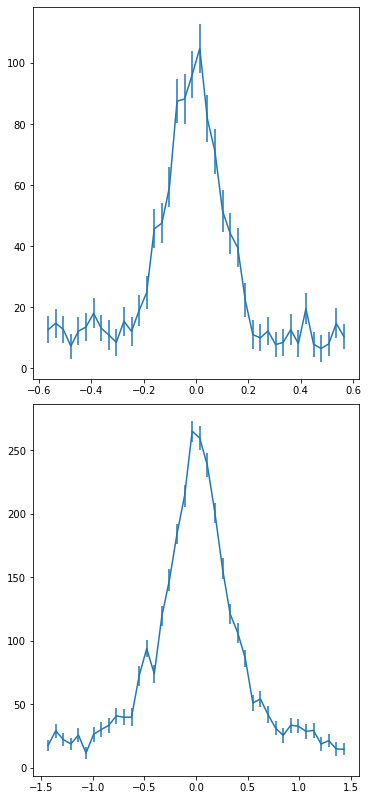

In [155]:
#declaring the variables to be plotted
##dataset 1
x1 = data_1[0]
y1 = data_1[1]
y1_err = data_1[2]

#dataset 2
x2 = data_2[0]
y2 = data_2[1]
y2_err = data_2[2]


#and now, we plot
fig, ax = plt.subplots(2,
                      figsize=(5,11),
                       constrained_layout=True
                      )

ax[0].errorbar(x_1, y_1, yerr = y1_err)
ax[1].errorbar(x_2, y_2, yerr = y2_err)

[[Model]]
    (Model(voigt) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1358
    # data points      = 40
    # variables        = 4
    chi-square         = 907.499065
    reduced chi-square = 25.2083074
    Akaike info crit   = 132.872523
    Bayesian info crit = 139.628041
[[Variables]]
    amplitude:  27.3386756 +/- 1.25075456 (4.58%) (init = -100000)
    center:    -0.00862192 +/- 0.00322278 (37.38%) (init = 0.6)
    sigma:      0.06141310 +/- 0.00288023 (4.69%) (init = 2)
    c:          7.27862571 +/- 1.23648052 (16.99%) (init = 25000)
    gamma:      0.06141310 +/- 0.00288023 (4.69%) == 'sigma'
    fwhm:       0.22116642 +/- 0.00630749 (2.85%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     92.9090931 +/- 2.92417867 (3.15%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.

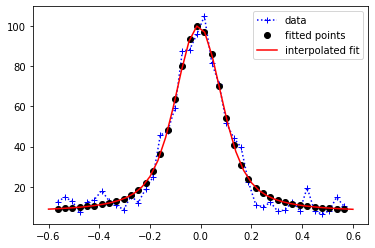

In [172]:
#the time has now come to take over the world with our coding capabilities
## we shall now come up with the Voigt model for our data in the form of Voigt + Constant

model = VoigtModel() + ConstantModel()

#parameters
params = model.make_params(amplitude=-1e5, center=0.6, 
                           sigma=2, gamma=0.2, c=25000)


# do the fit, print out report with results 
result = model.fit(y1, params, x=x1)
print(result.fit_report())

# plot data, best fit, fit interpolated to `xx`
xx = np.linspace(-0.6, 0.6, 40)
plt.plot(x1, y1, 'b+:', label='data')
plt.plot(x1, result.best_fit, 'ko', label='fitted points')
plt.plot(xx, result.eval(x=xx), 'r-', label='interpolated fit')
plt.legend()
plt.show()

In [ ]:
##and now for the Gaussian model (two "convoluted" Gauss)

modelg = GaussianModel() + ConstantModel()